In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/DataVerse/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
na = df.isna()
na.sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
output_labels = le.fit_transform(df['label'])
output_mappings = {index: label for index, label in enumerate(le.classes_)}
output_mappings

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [ ]:
df['label'] = output_labels
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


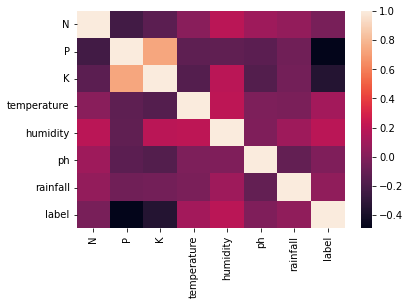

In [ ]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

In [ ]:
x = df.iloc[:, 0:7]
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y = df.iloc[:, 7:8]
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
x_train

,N,P,K,temperature,humidity,ph,rainfall
290,60,61,78,20.712193,19.836433,6.317153,94.036599
37,95,39,36,23.863305,83.152508,5.561399,285.249365
1507,0,123,205,22.027754,92.961295,5.790993,121.134918
2168,112,39,29,26.124922,63.374792,6.726529,147.803530
1309,118,13,54,24.413119,89.815740,6.039585,44.078435
...,...,...,...,...,...,...,...
789,60,59,22,31.868473,66.742175,7.191523,74.222386
968,14,25,40,20.073865,90.978197,6.407872,103.708406
1667,36,29,13,20.681852,90.915105,7.829507,109.751393
1688,18,14,11,28.047995,90.006217,6.550814,117.131150


In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1704,31,68,45,42.923253,90.076005,6.938313,196.240824
1641,0,23,15,22.566642,93.374889,7.598729,109.858575
1873,23,7,34,26.105512,91.524212,5.852038,134.127967
1811,26,10,33,28.272981,96.936495,6.070718,198.823486
999,8,28,37,23.884048,86.206138,6.082572,108.312179
...,...,...,...,...,...,...,...
1838,30,25,31,26.312706,98.620480,5.804965,208.118138
1747,34,65,48,41.419684,90.038631,6.665025,199.309643
1453,93,22,48,29.125337,91.522911,6.776988,21.904404
1802,13,28,33,28.130115,95.648076,5.686973,151.076190


In [ ]:
y_train

,label
290,3
37,20
1507,0
2168,5
1309,21
...,...
789,2
968,19
1667,16
1688,16


In [ ]:
y_test

,label
1704,17
1641,16
1873,4
1811,4
999,19
...,...
1838,4
1747,17
1453,15
1802,4


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

LogisticRegression(multi_class='ovr')

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([17, 16,  4,  4, 19,  7, 12,  4, 19, 10, 13, 20,  5, 18, 15, 15,  1,
       18, 12,  3,  6,  7,  2,  9,  9,  8,  9, 20,  9, 16, 15,  7, 13,  7,
       20, 11, 21, 10,  4, 17, 12,  8,  1, 10,  7,  9, 11,  5,  3,  0,  9,
        8,  2,  3, 14,  8,  5, 12, 13, 15,  4,  9, 13,  3,  2,  5, 21,  0,
       21,  0, 16, 14, 16,  9,  7, 13,  8, 21, 15,  6,  7,  4, 16,  7,  2,
       19, 15, 14, 11,  8, 18,  3, 17, 18, 21,  8,  0, 14,  7, 10,  1,  8,
       14,  1, 19, 15,  1, 16, 17, 13,  1, 10, 20,  4, 11,  5, 18, 10, 20,
       11, 18, 15,  4, 14,  8, 14, 14, 16, 11, 10, 21, 15, 16, 12,  2,  3,
       14,  5,  2, 15,  2, 13,  6,  0,  3, 16,  7, 13, 19,  3,  0,  3, 14,
       15, 14, 18,  5, 12,  2,  4,  1, 20,  9, 20, 19, 20, 20,  6, 15, 17,
       20,  3, 20, 16, 13, 15,  3,  2,  1,  0, 14, 20, 21, 11,  0, 16, 16,
       18,  7, 20,  8, 13,  4, 20, 12, 18,  5,  7, 15, 20,  4, 18,  9,  7,
        5,  9,  3, 14,  9,  9, 20,  3, 11, 10, 16,  9, 10,  4, 21, 19, 13,
        9,  7, 19, 19,  0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        25
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        24
           8       0.89      0.89      0.89        18
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        19
          11       0.95      0.95      0.95        19
          12       1.00      1.00      1.00        21
          13       1.00      0.94      0.97        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        21
          17       0.94    

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9818181818181818

In [21]:
# Logistic Regression: Accuracy = 0.981
# Naive Bayes: Accuracy = 0.993 (best)
# KNN: Accuracy = 0.963